# HDBSCAN

extension of DBSCAN; allowing for dynamic cluster densities

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

In [6]:
import hdbscan

import numpy as np
import sklearn.datasets as data

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.style.use('ggplot')

### generate data

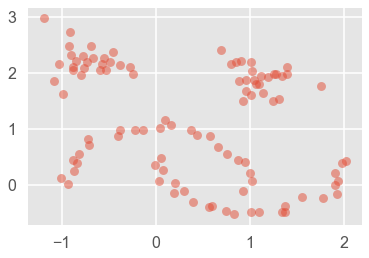

In [8]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])

plt.scatter(test_data.T[0], test_data.T[1], **plot_kwds)

### train

In [9]:
hdb = hdbscan.HDBSCAN(min_cluster_size=5,
                     gen_min_span_tree=True)

hdb.fit(test_data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

### training steps

Internal HDBSCAN training steps:

1. Transform the space according to the density/sparsity.
1. Build the minimum spanning tree of the distance weighted graph.
1. Construct a cluster hierarchy of connected components.
1. Condense the cluster hierarchy based on minimum cluster size.
1. Extract the stable clusters from the condensed tree.

In [17]:
# (1.) transform based on density

<img src="https://hdbscan.readthedocs.io/en/latest/_images/math/1899203b938ecdd54dd12838e2710e2e3dd63308.png">

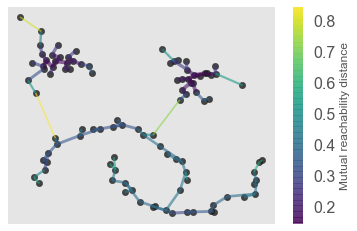

In [16]:
# (2.) minimum spanning tree
hdb.minimum_spanning_tree_.plot(edge_cmap='viridis',
                               edge_alpha=.6,
                               edge_linewidth=1.5)

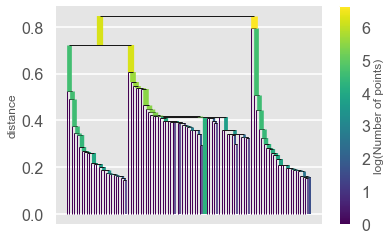

In [19]:
# (3.) convert mst to hierarchy
hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
# note vanilla DBSCAN effectively sets horizontal threshold here, with threshold as a parameter

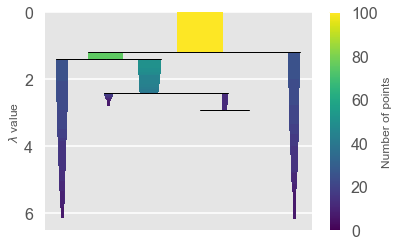

In [20]:
# (4.) condense trees
hdb.condensed_tree_.plot()

In [42]:
# (5.) extract clusters that maximize sum of cluster stabilities

cluster stability =

<img src="https://hdbscan.readthedocs.io/en/latest/_images/math/b15fedc83ff24fec90ecf5a40735ced75bc5fbaf.png">

<img src="https://hdbscan.readthedocs.io/en/latest/_images/math/c63b4a965929375dc1be413f70b5b85b636a1e18.png">

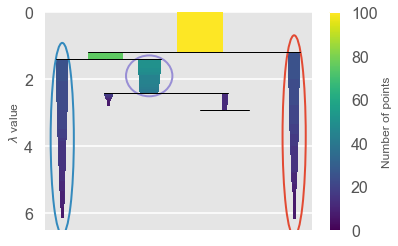

In [43]:
hdb.condensed_tree_.plot(select_clusters=True,
                        selection_palette=sns.color_palette())

### results

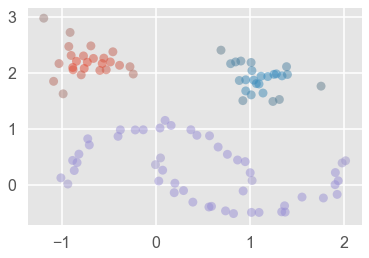

In [47]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                 if col >= 0 else (1,1,1)
                  for col, sat in zip(hdb.labels_, hdb.probabilities_)]

plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)